In [1]:
# load the packages needed
import numpy as np
import sys
if "../" not in sys.path:
    sys.path.append("../") 
from tsap.solver import Solver
from tsap.model import AR, MA
import tsap.data_processor as dp
import tsap.inference as inf
from tsap.ts_gen import ar1_gen
import tsap.trading as tr
data = np.loadtxt("../data/GS.csv", delimiter=',')

In [2]:
X = np.array([data[0:100]])
Y = dp.get_return(X)


In [6]:
lag = 5
sigma = 1.0
intercept = 0.1
phi = np.array([[ 0.04560256],
        [ 0.0535601 ],
        [-0.78190871],
        [ 1.30062633],
        [ 0.46616754]])
phi = np.random.randn(5,1)
phi=np.array([[-0.62736565],
        [-1.1567537 ],
        [ 1.50057093],
        [-0.6409699 ],
        [-2.35534488]])
AR_model = AR(lag=lag, phi=phi, sigma=sigma, intercept=intercept)
AR_model.params

{'intercept': 0.1, 'phi': array([[-0.62735568],
        [-1.15732273],
        [ 1.50153643],
        [-0.64116497],
        [-2.35654947]]), 'sigma': 1.0}

In [7]:
_, grads = AR_model.loss(Y)
solver = Solver(AR_model, Y,
                          update_rule='sgd_momentum',
                          optim_config={
                            'learning_rate': 1e-6,
                          },
                          
                          num_epochs=10000, batch_size=1,
                          print_every=10)
solver.train()
AR_model.params

10000
the loss is 86.587142
the loss is 85.905647
the loss is 85.082692
the loss is 84.199219
the loss is 83.282933
the loss is 82.343016
the loss is 81.382173
the loss is 80.400819
the loss is 79.398540
the loss is 78.374595
the loss is 77.328089
the loss is 76.258033
the loss is 75.163355
the loss is 74.042907
the loss is 72.895452
the loss is 71.719668
the loss is 70.514128
the loss is 69.277299
the loss is 68.007525
the loss is 66.703014
the loss is 65.361829
the loss is 63.981862
the loss is 62.560822
the loss is 61.096210
the loss is 59.585290
the loss is 58.025065
the loss is 56.412237
the loss is 54.743169
the loss is 53.013833
the loss is 51.219757
the loss is 49.355956
the loss is 47.416848
the loss is 45.396159
the loss is 43.286804
the loss is 41.080735
the loss is 38.768771
the loss is 36.340367
the loss is 33.783333
the loss is 31.083479
the loss is 28.224151
the loss is 25.185632
the loss is 21.944349
the loss is 18.471801
the loss is 14.733101
the loss is 10.684927
the 

{'intercept': array([ 0.0039453]), 'phi': array([[-0.62736565],
        [-1.1567537 ],
        [ 1.50057093],
        [-0.6409699 ],
        [-2.35534488]]), 'sigma': array([ 0.0288069])}

In [23]:
l=100
nstep=6
window=3
money=100

profit, signal, pred_price = tr.rolltrade(np.array([data]),AR_model,l,nstep,window,money)

#signal

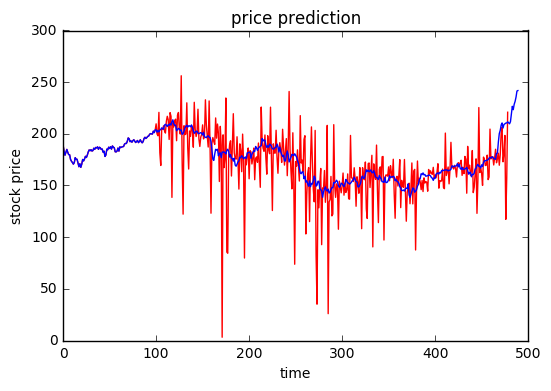

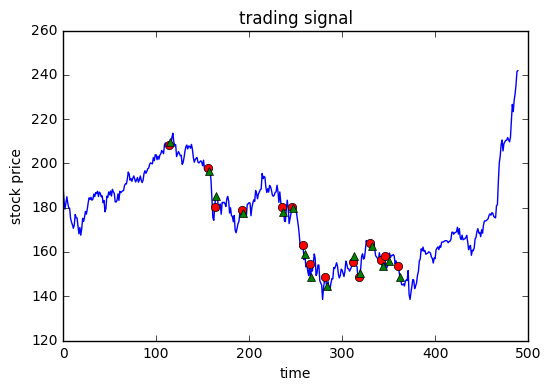

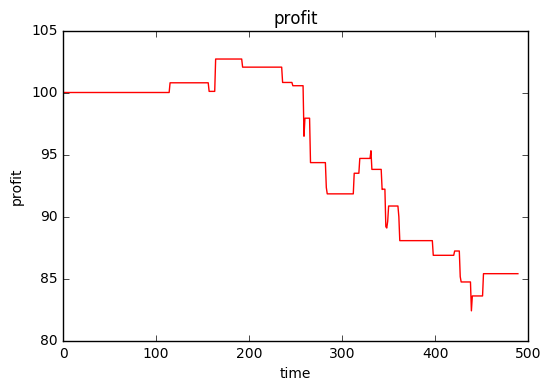

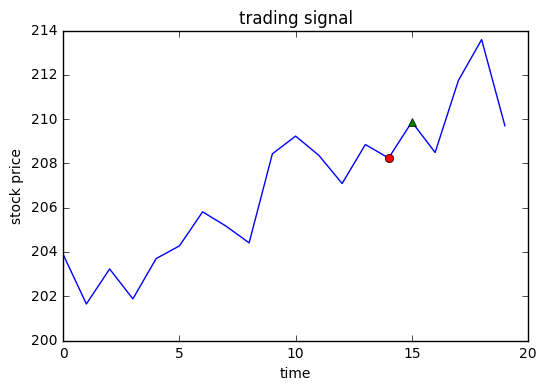

85.3887151597


In [24]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(pred_price[0,0:data.shape[0]-11],'r')
plt.plot(data,'b')
plt.hold(True)     
plt.xlabel('time')
plt.ylabel('stock price')
plt.title('price prediction')
plt.show() 




        
plt.figure()
plt.plot(data[0:],'b')
for i in range(data.shape[0]-l):
    if signal[0,i]==1:
        plt.plot(i,data[i],'ro')
    if signal[0,i]==-1:
        plt.plot(i,data[i],'g^')
plt.xlabel('time')
plt.ylabel('stock price')
plt.title('trading signal')
plt.show()




plt.figure()
plt.plot(profit[0,:],'r')
plt.xlabel('time')
plt.ylabel('profit')
plt.title('profit')
plt.show()


"""plt.figure()
plt.plot(data[l:],'b')
for i in range(data.shape[0]-l):
    if signal[0,l+i]==1:
        plt.plot(i,data[l+i],'ro')
    if signal[0,l+i]==-1:
        plt.plot(i,data[l+i],'g^')
plt.xlabel('time')
plt.ylabel('stock price')
plt.title('trading signal')"""

        
        
plt.figure()
plt.plot(data[l:l+20],'b')
for i in range(20):
    if signal[0,100+i]==1:
        plt.plot(i,data[100+i],'ro')
    if signal[0,100+i]==-1:
        plt.plot(i,data[100+i],'g^')
plt.xlabel('time')
plt.ylabel('stock price')
plt.title('trading signal')
plt.show()


print profit[0,-1]

In [11]:
phi_y, sigma_y = inf.yule_walker(Y, order =5, method='unbiased')
AR_model_y = AR(lag=5, phi=phi_y, sigma=sigma_y, intercept=0)


l=100
nstep=20
window=5
money=100

profit, signal, pred_price = tr.rolltrade(np.array([data]),AR_model_y,l,nstep,window,money)

signal

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -1.,  0.,  0.,  0.,
         0.,  1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., -1.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0., -1.,  0.,  0.,  0.,  0.

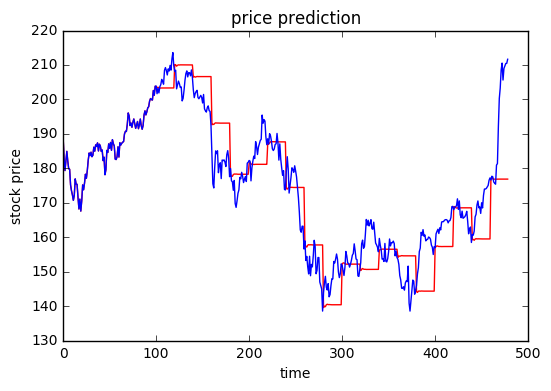

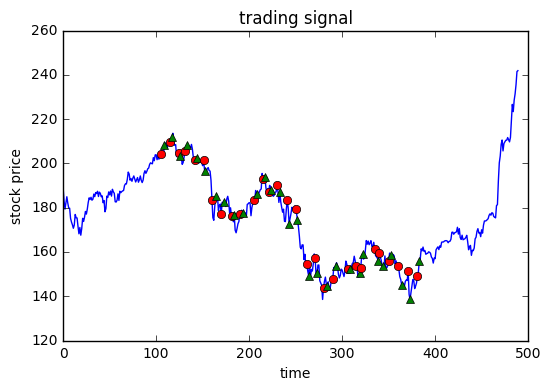

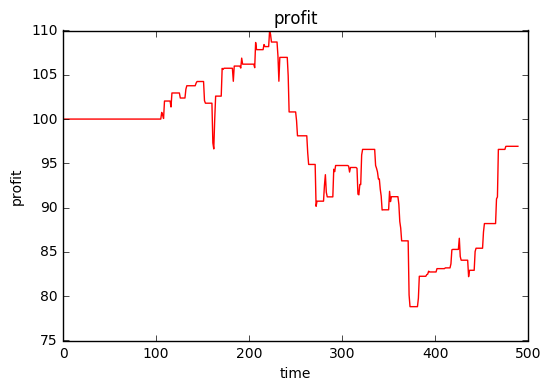

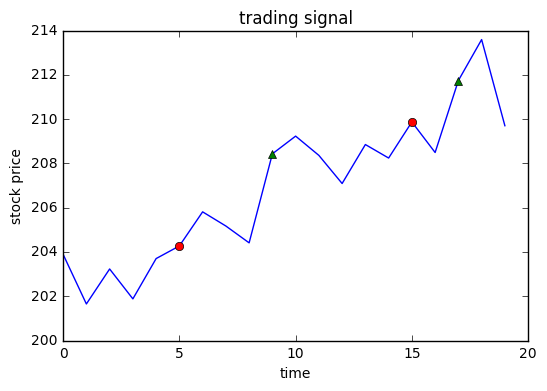

96.9255372709


In [13]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(pred_price[0,0:data.shape[0]-11],'r')
plt.plot(data[0:data.shape[0]-11],'b')
plt.hold(True)     
plt.xlabel('time')
plt.ylabel('stock price')
plt.title('price prediction')
plt.show() 




        
plt.figure()
plt.plot(data[0:],'b')
for i in range(data.shape[0]-l):
    if signal[0,i]==1:
        plt.plot(i,data[i],'ro')
    if signal[0,i]==-1:
        plt.plot(i,data[i],'g^')
plt.xlabel('time')
plt.ylabel('stock price')
plt.title('trading signal')
plt.show() 



plt.figure()
plt.plot(profit[0,:],'r')
plt.xlabel('time')
plt.ylabel('profit')
plt.title('profit')
plt.show() 

"""plt.figure()
plt.plot(data[l:],'b')
for i in range(data.shape[0]-l):
    if signal[0,l+i]==1:
        plt.plot(i,data[l+i],'ro')
    if signal[0,l+i]==-1:
        plt.plot(i,data[l+i],'g^')
plt.xlabel('time')
plt.ylabel('stock price')
plt.title('trading signal')"""

        
        
plt.figure()
plt.plot(data[l:l+20],'b')
for i in range(20):
    if signal[0,100+i]==1:
        plt.plot(i,data[100+i],'ro')
    if signal[0,100+i]==-1:
        plt.plot(i,data[100+i],'g^')
plt.xlabel('time')
plt.ylabel('stock price')
plt.title('trading signal')
plt.show() 

print profit[0,-1]